In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv("Iris.csv")

## EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


I have no nulls in my dataset

In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


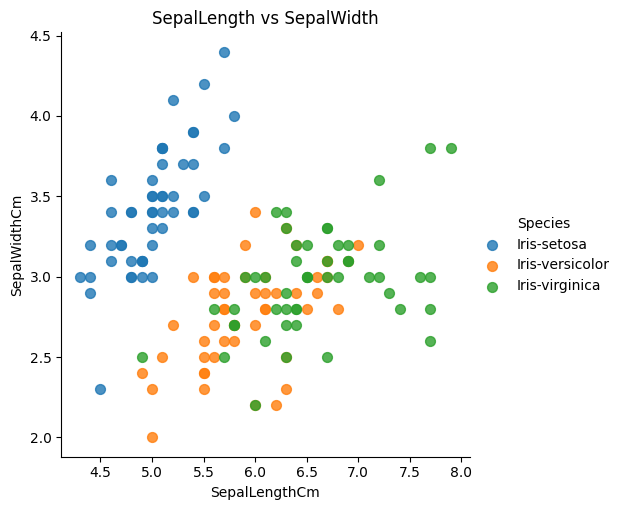

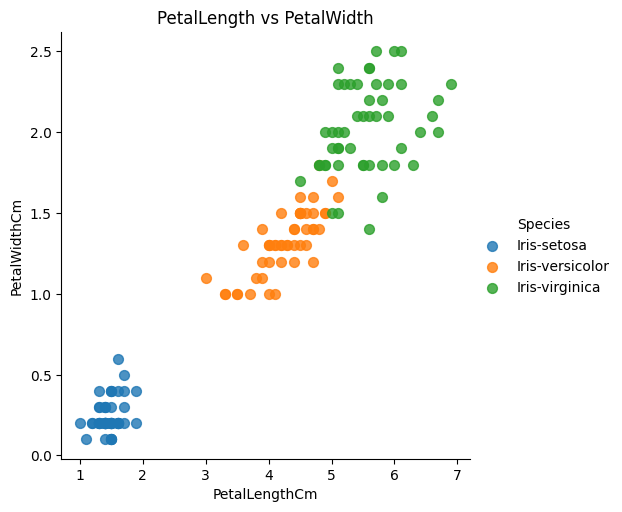

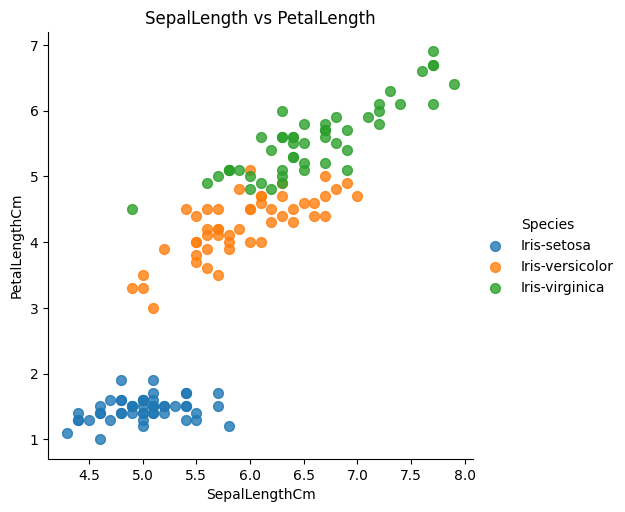

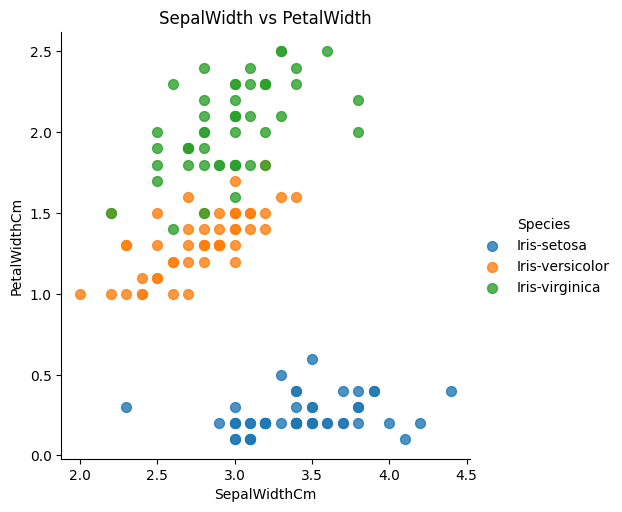

In [8]:
#visualize the data
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('SepalLength vs SepalWidth')
plt.show()

sns.lmplot(x='PetalLengthCm', y='PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('PetalLength vs PetalWidth')
plt.show()

sns.lmplot(x='SepalLengthCm', y='PetalLengthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('SepalLength vs PetalLength')
plt.show()

sns.lmplot(x='SepalWidthCm', y='PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()



iris setosa can be separated form the other two

The values for petal length, width and sepal width are easy separable

COUNTING THE SPECIES IN TOTAL

<Axes: xlabel='Species', ylabel='count'>

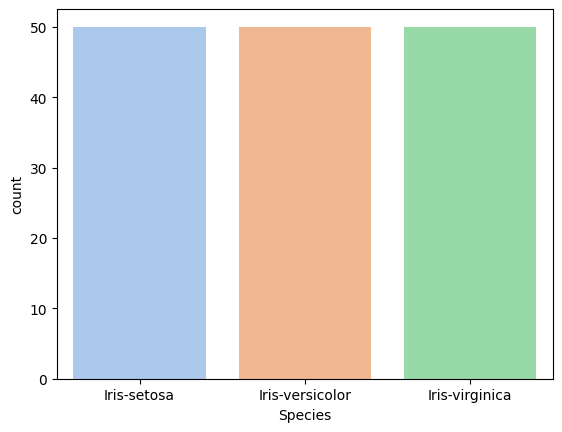

In [9]:
sns.countplot(x='Species',data=data, palette="pastel")

In [10]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

BOX PLOT OF THE DISTRIBUTION OF DIFFERENT DATA ACROSS THE THREE SPECIES

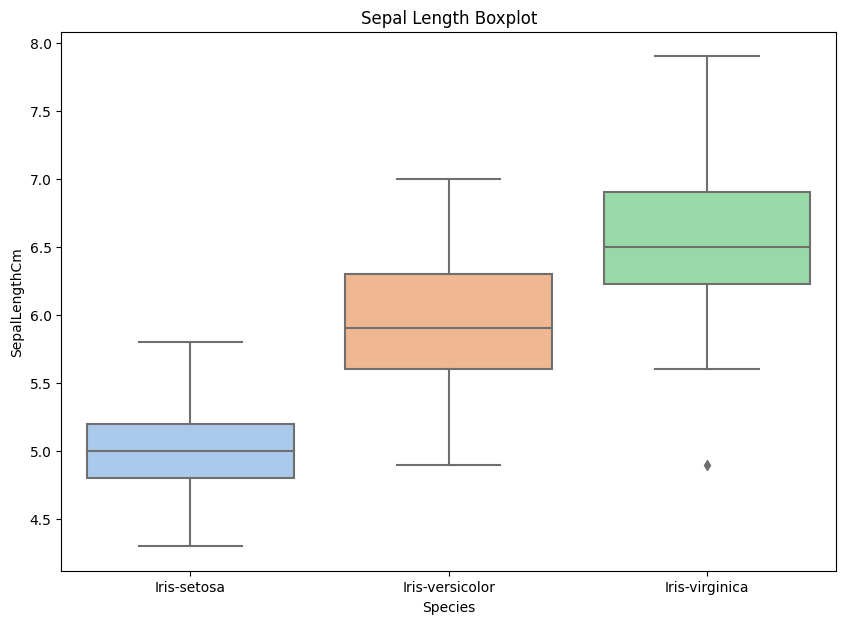

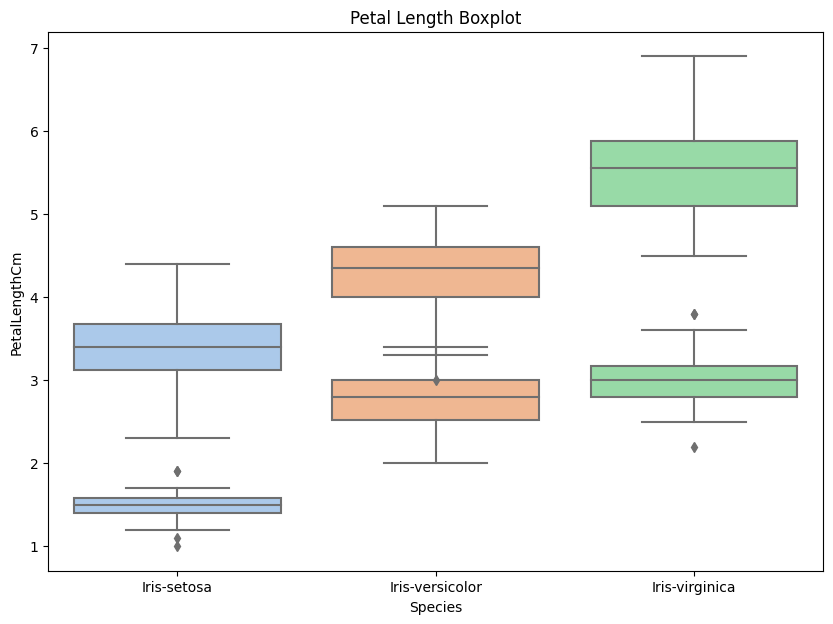

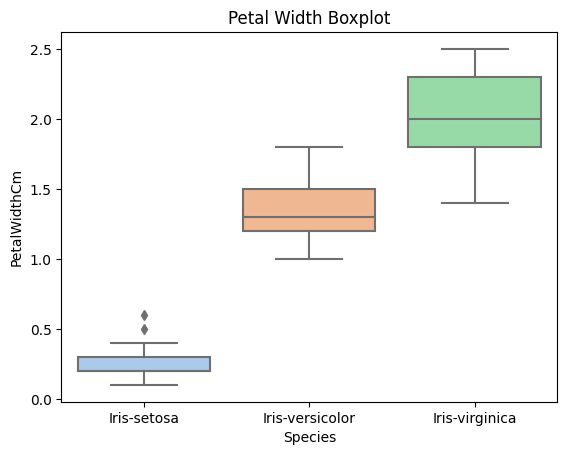

In [11]:
plt.figure(figsize=(10,7))

# Boxplot for SepalLengthCm
sns.boxplot(x='Species', y='SepalLengthCm', data=data, palette='pastel')
plt.title('Sepal Length Boxplot')
plt.show()

# Boxplot for SepalWidthCm
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='SepalWidthCm',data=data ,palette='pastel')

# Boxplot for PetalLengthCm
sns.boxplot(x='Species', y='PetalLengthCm', data=data, palette='pastel')
plt.title('Petal Length Boxplot')
plt.show()

# Boxplot for PetalWidthCm
sns.boxplot(x='Species', y='PetalWidthCm', data=data, palette='pastel')
plt.title('Petal Width Boxplot')
plt.show()


Violin graph for the representation of the distirbution in each class

<Figure size 1500x600 with 0 Axes>

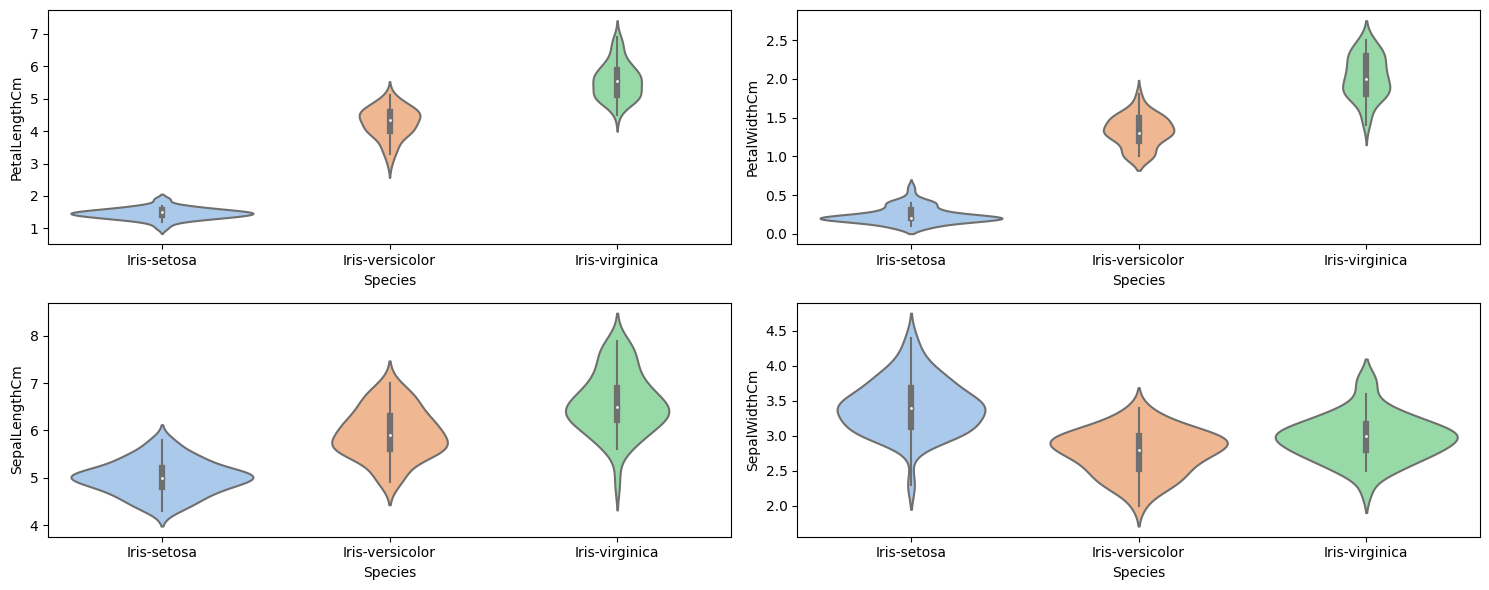

In [12]:
plt.figure(figsize=(15, 6))
features = ['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']

palette = "pastel"

ig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
flat_axes = axes.flatten()

for ax, feature in zip(flat_axes, features):
    sns.violinplot(x='Species', y=feature, data=data, ax=ax, palette=palette)
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()


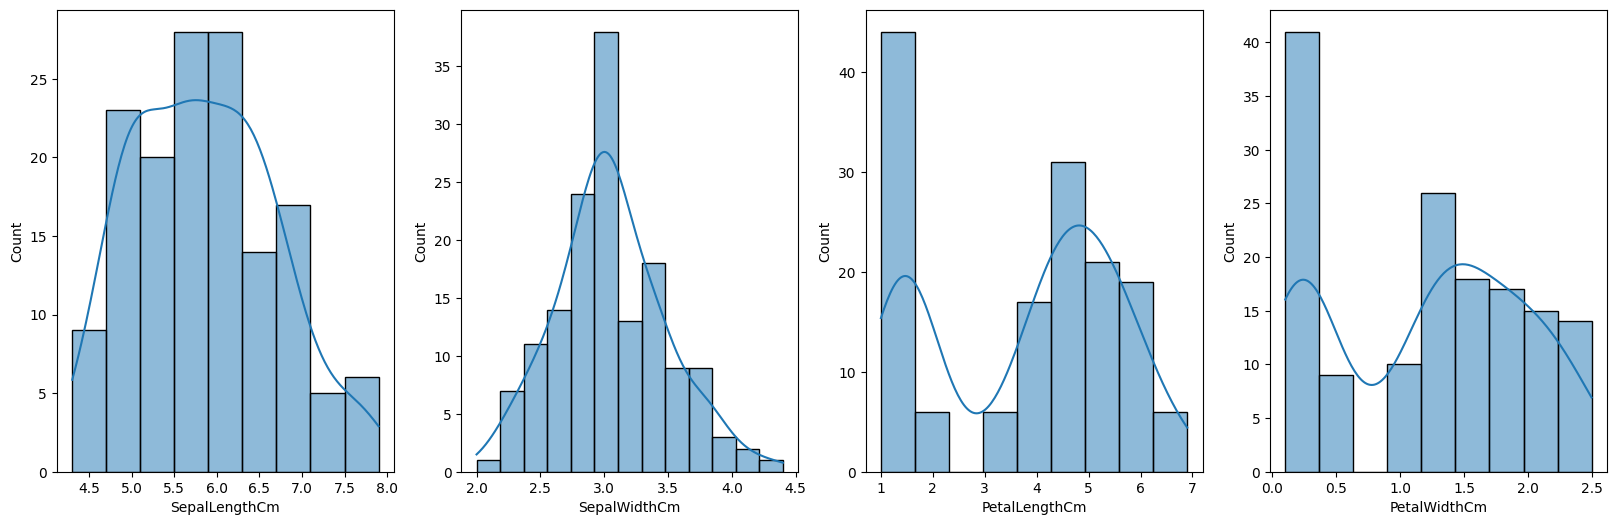

In [13]:
fig, ax =plt.subplots(1,4,figsize=(20,6))


sns.histplot(data.SepalLengthCm, kde = True, ax=ax[0])
sns.histplot(data.SepalWidthCm, kde = True, ax=ax[1])
sns.histplot(data.PetalLengthCm, kde = True, ax=ax[2])
sns.histplot(data.PetalWidthCm, kde = True, ax=ax[3])

fig.show();

<ipython-input-14-3a08c126dd28>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


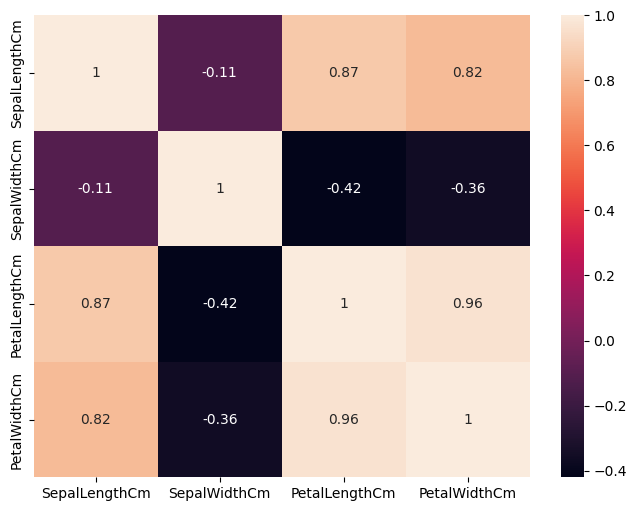

In [14]:
#correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

The correlations between the length and width are high

SepalLength and SepalWidth have low negative correlation. PetalLength and PetalWidth have high positive correlation.

## DATA **PREPARATION**

In [15]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Species'])

X = data.drop('Species', axis=1)

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

# Transform the TESTING data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [18]:
from keras.utils import to_categorical

# Converting the integer encoded labels to categorical format for training and testing data
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### MODEL

In [19]:
num_classes = 3  #we have 3 classses

classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(X.shape[1],)))
classifier.add(tf.keras.layers.Dense(units=8, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))  # num_classes units

# Compilation--> categorical crossentropy
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs_hist = classifier.fit(X_train_sc, y_train_categorical, epochs=50, batch_size=4, validation_split = 0.2)

Epoch 1/50
24/24 [==============================] - 2s 26ms/step - loss: 1.2593 - accuracy: 0.2604 - val_loss: 1.1248 - val_accuracy: 0.2917
Epoch 2/50
24/24 [==============================] - 0s 8ms/step - loss: 1.0792 - accuracy: 0.4375 - val_loss: 1.0178 - val_accuracy: 0.4167
Epoch 3/50
24/24 [==============================] - 0s 11ms/step - loss: 0.9610 - accuracy: 0.6146 - val_loss: 0.9435 - val_accuracy: 0.5000
Epoch 4/50
24/24 [==============================] - 0s 13ms/step - loss: 0.8759 - accuracy: 0.6875 - val_loss: 0.8720 - val_accuracy: 0.5833
Epoch 5/50
24/24 [==============================] - 0s 8ms/step - loss: 0.7998 - accuracy: 0.7188 - val_loss: 0.8053 - val_accuracy: 0.6250
Epoch 6/50
24/24 [==============================] - 0s 11ms/step - loss: 0.7328 - accuracy: 0.7604 - val_loss: 0.7369 - val_accuracy: 0.8333
Epoch 7/50
24/24 [==============================] - 0s 8ms/step - loss: 0.6662 - accuracy: 0.8333 - val_loss: 0.6897 - val_accuracy: 0.8750
Epoch 8/50
24/24

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 (972.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
y_pred = classifier.predict(X_test_sc)
y_pred

1/1 [==============================] - 0s 275ms/step


array([[2.6985984e-03, 8.6470604e-01, 1.3259532e-01],
       [9.9694407e-01, 1.9446632e-03, 1.1112442e-03],
       [1.7026791e-07, 3.4280191e-03, 9.9657166e-01],
       [5.7966979e-03, 7.0754880e-01, 2.8665453e-01],
       [6.6676963e-04, 7.6960820e-01, 2.2972493e-01],
       [9.9514824e-01, 3.3035965e-03, 1.5481120e-03],
       [1.4997787e-02, 9.6002227e-01, 2.4979858e-02],
       [1.9326113e-04, 6.2472042e-02, 9.3733472e-01],
       [2.9565857e-04, 7.0500934e-01, 2.9469487e-01],
       [2.3200954e-03, 9.8204792e-01, 1.5631989e-02],
       [1.1689904e-03, 1.8136775e-01, 8.1746322e-01],
       [9.9733621e-01, 1.8963938e-03, 7.6734036e-04],
       [9.9788052e-01, 1.3288005e-03, 7.9075183e-04],
       [9.9750274e-01, 1.6620796e-03, 8.3527883e-04],
       [9.9894363e-01, 6.1119453e-04, 4.4530234e-04],
       [6.5503721e-03, 7.5831741e-01, 2.3513220e-01],
       [9.4452509e-05, 3.4682307e-02, 9.6522319e-01],
       [1.2747395e-03, 9.8942512e-01, 9.2999749e-03],
       [5.4749055e-03, 8.774

In [22]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

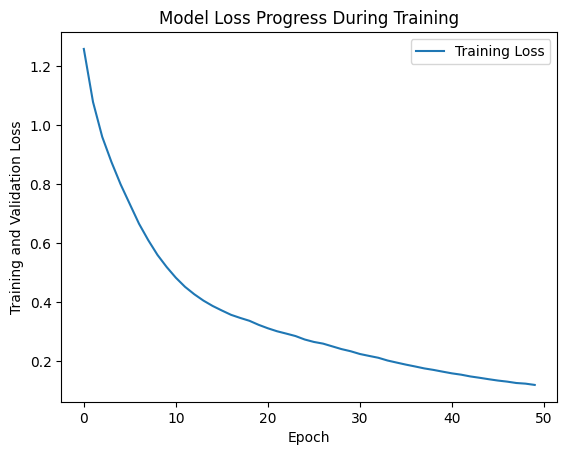

In [23]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

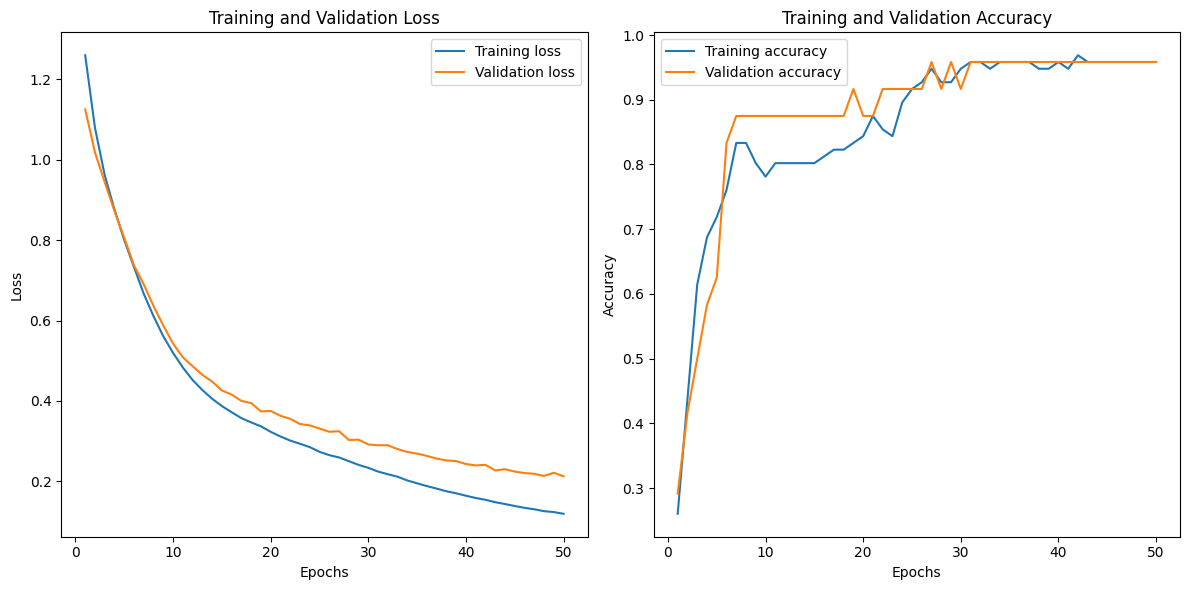

In [24]:
epochs = range(1, len(epochs_hist.history['loss']) + 1)

# Gráficas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, epochs_hist.history['loss'], label='Training loss')
plt.plot(epochs, epochs_hist.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, epochs_hist.history['accuracy'], label='Training accuracy')
plt.plot(epochs, epochs_hist.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Train Performance

4/4 [==============================] - 0s 5ms/step


<Axes: >

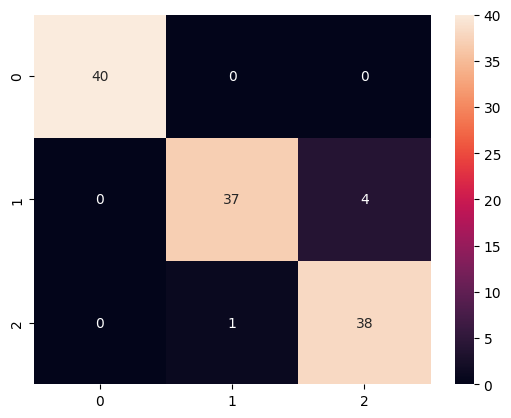

In [25]:
from sklearn.metrics import confusion_matrix

# Predict classes using the trained model for the training set
y_train_pred = classifier.predict(X_train_sc)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)  # Get the class with the highest probability

# If your y_train_categorical is one-hot encoded, extract the class labels
y_train_classes = np.argmax(y_train_categorical, axis=1)

# Create the confusion matrix
conf_matrix_train = confusion_matrix(y_train_classes, y_train_pred_classes)

# Display the Confusion Matrix as a heatmap
sns.heatmap(conf_matrix_train, annot=True)

In [26]:
from sklearn.metrics import classification_report

# If your y_train_categorical is one-hot encoded, get the class labels
y_train_true = np.argmax(y_train_categorical, axis=1)

# Generate the classification report
print(classification_report(y_train_true, y_train_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.90      0.94        41
           2       0.90      0.97      0.94        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



# Test Performance

1/1 [==============================] - 0s 60ms/step


<Axes: >

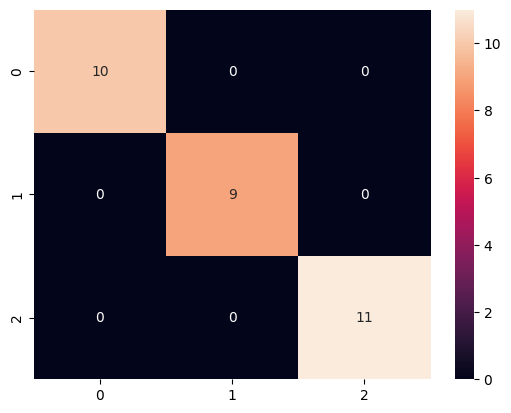

In [27]:
# Predict classes using the trained model for the test set
y_test_pred = classifier.predict(X_test_sc)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)  # Get the class with the highest probability

# If your y_test_categorical is one-hot encoded, extract the class labels
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Create the confusion matrix
conf_matrix_train = confusion_matrix(y_test_classes, y_test_pred_classes)

# Display the Confusion Matrix as a heatmap
sns.heatmap(conf_matrix_train, annot=True)

In [28]:
# If your y_test_categorical is one-hot encoded, get the class labels
y_test_true = np.argmax(y_test_categorical, axis=1)

# Generate the classification report
print(classification_report(y_test_true, y_test_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Saving model to .keras file
classifier.save('model_iris.keras')